# Alloy4Fun Data

## Import Data

In [272]:
import pandas as pd, os 
import collections
import matplotlib.pyplot as plt

def importDataFromDir(dir):
    # Import all the data from a directory
    # dir: directory with the data
    # return: a dictionary of dataframes
    dict = {}

    for file in os.listdir(dir):
        if file.endswith('.json'):
            df = pd.read_json(f'{dir}/' + file, lines=True)
            dict[file.removesuffix(".json")] = df
            print(f"Imported {file}.")

    return dict

In [273]:
# Import files from the data directory
dict = importDataFromDir('data/submissions')

Imported 9jPK8KBWzjFmBx4Hb.json.
Imported FwCGymHmbqcziisH5.json.
Imported gAeD3MTGCCv8YNTaK.json.
Imported JC8Tij8o8GZb99gEJ.json.
Imported jyS8Bmceejj9pLbTW.json.
Imported PQAJE67kz8w5NWJuM.json.
Imported sDLK7uBCbgZon3znd.json.
Imported WGdhwKZnCu7aKhXq9.json.
Imported YH3ANm7Y5Qe5dSYem.json.
Imported zoEADeCW2b2suJB2k.json.
Imported zRAn69AocpkmxXZnW.json.


## Data Cleaning

### Check null values

In [274]:
df1 = dict["9jPK8KBWzjFmBx4Hb"]
df1.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
0,zKAYz8BCDmHKgNoSx,1.0,7.0,prop8Ok,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,9jPK8KBWzjFmBx4Hb,1.0,2020-12-13 23:28:11,NaN,NaN
1,8FmQ9PNWT2SXncTxX,1.0,9.0,prop10Ok,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,9jPK8KBWzjFmBx4Hb,1.0,2019-11-11 21:54:33,NaN,NaN
2,eyGu5DYCrnk58G2fJ,1.0,6.0,prop7Ok,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,9jPK8KBWzjFmBx4Hb,1.0,2020-12-1 11:55:11,NaN,NaN
3,Akbr9Aq6WfBLHrvE8,1.0,18.0,prop19Ok,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,9jPK8KBWzjFmBx4Hb,1.0,2020-11-26 10:33:29,NaN,NaN
4,MNegade3hLiutxCru,1.0,10.0,prop11Ok,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,9jPK8KBWzjFmBx4Hb,1.0,2020-1-19 17:06:22,NaN,NaN


In [275]:
df1.isnull().sum()

_id                0
cmd_c            915
cmd_i             35
cmd_n            915
code               0
derivationOf       0
original           0
sat               35
time               0
msg             4353
theme           5218
dtype: int64

Features meaning:
- _id: the id of the interaction
- time: the timestamp of its creation
- derivationOf: the parent entry
- original: the first ancestor with secrets (always the same within an exercise)
- code: the complete code of the model (excluding the secrets defined in the original entry) (with student comments removed)
- sat: whether the command was satisfiable (counter-example found for checks), or -1 when error thrown [only for executions]
- cmd_i: the index of the executed command [only for executions]
- cmd_n: the name of the executed command [only for successful executions, i.e. no error thrown]
- cmd_c: whether the command was a check [only for successful executions, i.e. no error thrown]
- msg: the error or warning message [only for successful executions with warnings or when error thrown]
- theme: the visualisation theme [only for sharing entries

#### cmd_i null values

cmd_i is null for non-executions. 

In [276]:
# Filter rows with cmd_i = null
nullDF = df1[df1["cmd_i"].isnull()]
nullDF.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
32,P3gFuEkajduWTyFeo,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,6YmxWkc8PtXEqdafi,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:47:23,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
159,K2ejbWj7HT3mSFdym,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,4zDygwoYWF7AAqHv8,9jPK8KBWzjFmBx4Hb,NaN,2020-1-3 13:48:36,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
301,MdZs9uee25QgFwvi7,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,kb8KrpANCxg9XXcLs,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:48:12,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
337,fWKpSLkdPZPxkSoJe,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,8KGv5F6b8ySPofNdJ,9jPK8KBWzjFmBx4Hb,NaN,2019-10-31 11:52:15,NaN,"{'currentFramePosition': {}, 'currentlyProject..."
353,ggNDTsgGfpet9HqvY,NaN,NaN,NaN,/**\n * Linear temporal logic revision exercis...,NdNtvRAx8r85Fivh8,9jPK8KBWzjFmBx4Hb,NaN,2020-11-24 01:32:37,NaN,"{'currentFramePosition': {}, 'currentlyProject..."


In [277]:
print("Rows with cmd_i null: ", len(nullDF))
print("Rows with sat null: ", len(nullDF[nullDF["sat"].isnull()]))
print("Rows with cmd_c null : ", len(nullDF[nullDF["cmd_c"].isnull()]))
print("Rows with cmd_n null : ", len(nullDF[nullDF["cmd_n"].isnull()]))
print("Rows with theme null : ", len(nullDF[nullDF["theme"].isnull()]))

Rows with cmd_i null:  35
Rows with sat null:  35
Rows with cmd_c null :  35
Rows with cmd_n null :  35
Rows with theme null :  0


Whenever cmd_i is null it means that there was no execution. It is the sharing of a model. This cases might be irrelevant to the problem so they can be dropped.

In [278]:
def shortCircuit(df, row, index):
    # Short circuit the derivation of a row.
    # If A derives B and B derives C, then A derives C and B is removed.
    # df: dataframe
    # row: row to short circuit
    # return: dataframe with the row short circuited

    # Get row information
    id = row["_id"]
    derivation = row["derivationOf"]

    # Remove row
    df.drop(index, inplace=True)

    # Get derivations of row
    derivationSet = df[df["derivationOf"] == id] 
    # Short circuit derivations
    df.loc[df["derivationOf"] == id, "derivationOf"] = derivation

    return df

def dropNulls(dict, col):
    # Remove rows with col null
    # dict: dictionary of dataframes
    # return: dataframe with rows with col null removed

    for df in dict.values():
        # Filter rows with col= null
        nullDF = df[df[col].isnull()]
        # Short circuit derivations
        for index, row in nullDF.iterrows():
            df = shortCircuit(df, row, index)

    return dict


# Drop rows with cmd_i null
dict = dropNulls(dict, "cmd_i")
# Check results
df1 = dict["9jPK8KBWzjFmBx4Hb"]
nullDF = df1[df1["cmd_i"].isnull()]
nullDF.head()


,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme


#### cmd_c and cmd_n null values

In [279]:
# Filter rows with cmd_c = null
nullDF = df1[df1["cmd_c"].isnull()]
nullDF.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
13,nuWnon2d7N7N7ZFvw,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,ZjxPhwuLGd52cZyox,9jPK8KBWzjFmBx4Hb,-1.0,2020-11-23 23:09:43,There are 1 possible tokens that can appear he...,NaN
14,sxuHvWgfPeRh9QYYy,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,RBovdMdE7s7k2Z3xY,9jPK8KBWzjFmBx4Hb,-1.0,2020-12-1 21:46:47,There are 37 possible tokens that can appear h...,NaN
16,xPeTe3FdpxzspZTta,NaN,7.0,NaN,/**\n * Linear temporal logic revision exercis...,t45BxKKpdXbYN4Aun,9jPK8KBWzjFmBx4Hb,-1.0,2020-11-26 10:17:06,There are 1 possible tokens that can appear he...,NaN
20,GQbQyxLarysc73gH7,NaN,3.0,NaN,/**\n * Linear temporal logic revision exercis...,2js6dSN2dk4HhJmbF,9jPK8KBWzjFmBx4Hb,-1.0,2020-12-1 11:39:04,There are 37 possible tokens that can appear h...,NaN
25,CCt6wniT5St2hKKFr,NaN,0.0,NaN,/**\n * Linear temporal logic revision exercis...,9jPK8KBWzjFmBx4Hb,9jPK8KBWzjFmBx4Hb,-1.0,2019-10-31 10:48:50,There are 29 possible tokens that can appear h...,NaN


In [280]:
print("Rows with cmd_c null: ", len(nullDF))
print("Rows with cmd_n null: ", len(nullDF[nullDF["cmd_n"].isnull()]))
print("Rows with msg null: ", len(nullDF[nullDF["msg"].isnull()]))
print("Rows with negative sat: ", len(nullDF[nullDF["sat"] == -1]))

Rows with cmd_c null:  880
Rows with cmd_n null:  880
Rows with msg null:  0
Rows with negative sat:  880


Whenever cmd_c is null, cmd_n is also null. These values are null for cases where a syntactic error is thrown and a msg appears.
The code in these case is not parseable. We can drop these rows.

In [281]:
# drop rows with cmd_c null
dict = dropNulls(dict, "cmd_c")
# Check results
df1 = dict["9jPK8KBWzjFmBx4Hb"]
df1.isnull().sum()

_id                0
cmd_c              0
cmd_i              0
cmd_n              0
code               0
derivationOf       0
original           0
sat                0
time               0
msg             4318
theme           4338
dtype: int64

Dealing with mgs and theme null values is not important in these context.

### Remove extra features

#### cmd_c feature

Counter({1.0: 21234, 0.0: 23})


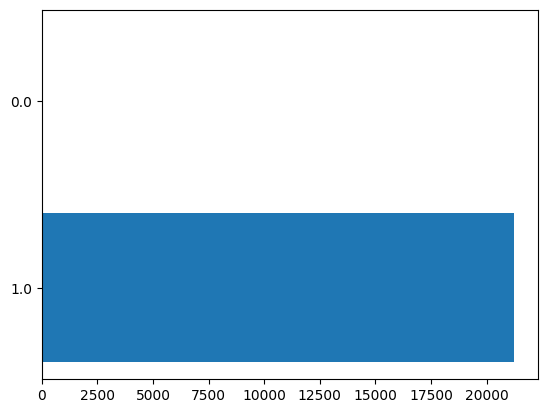

In [282]:
def countValues(dict, col):
    # Count the values in a column
    # df: dataframe
    # col: column to count
    # return: dataframe with the counts
    totalCount = collections.Counter()

    for df in dict.values():
        count = df[col].value_counts().to_dict()
        totalCount.update(count)        

    return totalCount

# Count the different values in the cmd_c column across all the dataframes
counter = countValues(dict, 'cmd_c')
print(counter)

plt.barh([str(k) for k in counter.keys()], counter.values())
plt.show()


The number of 0 values for the column cmd_c is irrelevant (when the executed command is not a check). For that reason, entries with these values should be dropped.

In [283]:
def dropNonChecks(dict):
    # Drop the rows that are not checks
    # dict: dictionary of dataframes
    # return: dataframe with the rows that are not checks removed

    for df in dict.values():
        # Filter rows with cmd_c != 0
        dfToDrop = df[df["cmd_c"] == 0]
        # Short circuit derivations
        for index, row in dfToDrop.iterrows():
            df = shortCircuit(df, row, index)

    return dict

# Remove the rows with the value 0 in the cmd_c column
dropNonChecks(dict)

# Count the different values in the cmd_c column
print(countValues(dict, 'cmd_c'))

Counter({1.0: 21234})


#### original feature

In [284]:
def operateDFs(dict, op, arg):
    # Operate on each dataframe in a dictionary
    # dict: dictionary of dataframes
    # op: operation to perform
    # arg: argument to pass to the operation
    for df in dict.values():
        op(df, arg)

# Count the different values for the original column for each dataframe
countValuesOp = (lambda df, arg: print(df[arg].value_counts().to_dict()))
operateDFs(dict, countValuesOp, 'original')

{'9jPK8KBWzjFmBx4Hb': 4338}
{'FwCGymHmbqcziisH5': 972}
{'gAeD3MTGCCv8YNTaK': 1764}
{'JC8Tij8o8GZb99gEJ': 665}
{'jyS8Bmceejj9pLbTW': 459}
{'PQAJE67kz8w5NWJuM': 1934}
{'sDLK7uBCbgZon3znd': 2216}
{'WGdhwKZnCu7aKhXq9': 283}
{'YH3ANm7Y5Qe5dSYem': 3478}
{'zoEADeCW2b2suJB2k': 1633}
{'zRAn69AocpkmxXZnW': 3492}


Every dataframe has the same value for the original column. This column is irrelevant.

#### cmd_n feature

In [285]:
df1["cmd_n"].value_counts()

prop5Ok     426
prop12Ok    413
prop6Ok     388
prop10Ok    350
prop8Ok     338
prop18Ok    241
prop4Ok     233
prop2Ok     227
prop11Ok    214
prop9Ok     177
prop14Ok    161
prop1Ok     158
prop7Ok     149
prop17Ok    148
prop16Ok    145
prop20Ok    131
prop13Ok    120
prop3Ok     110
prop19Ok    108
prop15Ok    101
Name: cmd_n, dtype: int64

In [286]:
df1["cmd_i"].value_counts()

4.0     426
11.0    413
5.0     388
9.0     350
7.0     338
17.0    241
3.0     233
1.0     227
10.0    214
8.0     177
13.0    161
0.0     158
6.0     149
16.0    148
15.0    145
19.0    131
12.0    120
2.0     110
18.0    108
14.0    101
Name: cmd_i, dtype: int64

First step is to encode the categorical value.

In [287]:
# Encode all the values in the cmd_n column
# Remove the prefix and suffix
df1.loc[df1["cmd_n"].str.contains("Ok"), "cmd_n"] = df1["cmd_n"].str[4:].str.removesuffix("Ok")
df1["cmd_n"] = df1["cmd_n"].astype('int') # transform to ints
df1.head()

,_id,cmd_c,cmd_i,cmd_n,code,derivationOf,original,sat,time,msg,theme
0,zKAYz8BCDmHKgNoSx,1.0,7.0,8,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,9jPK8KBWzjFmBx4Hb,1.0,2020-12-13 23:28:11,NaN,NaN
1,8FmQ9PNWT2SXncTxX,1.0,9.0,10,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,9jPK8KBWzjFmBx4Hb,1.0,2019-11-11 21:54:33,NaN,NaN
2,eyGu5DYCrnk58G2fJ,1.0,6.0,7,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,9jPK8KBWzjFmBx4Hb,1.0,2020-12-1 11:55:11,NaN,NaN
3,Akbr9Aq6WfBLHrvE8,1.0,18.0,19,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,9jPK8KBWzjFmBx4Hb,1.0,2020-11-26 10:33:29,NaN,NaN
4,MNegade3hLiutxCru,1.0,10.0,11,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,9jPK8KBWzjFmBx4Hb,1.0,2020-1-19 17:06:22,NaN,NaN


In [288]:
print("Correlation between cmd_n and cmd_i: ", df1["cmd_n"].corr(df1["cmd_i"]))

Correlation between cmd_n and cmd_i:  1.0


After encoding, cmd_n and cmd_i are highly correlated features. So we can drop one of this columns.

Now we will drop the irrelevant columns. 

In [289]:
# Drop columns that are not needed
dropColOp = (lambda df, arg: df.drop(columns=arg, axis=1, inplace=True))
operateDFs(dict, dropColOp, ["cmd_c", "cmd_n", "original", "time", "msg", "theme"])

dict["9jPK8KBWzjFmBx4Hb"].head()

,_id,cmd_i,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,7.0,/**\n * Linear temporal logic revision exercis...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,9.0,/**\n * Linear temporal logic revision exercis...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,6.0,/**\n * Linear temporal logic revision exercis...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,18.0,/**\n * Linear temporal logic revision exercis...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,10.0,/**\n * Linear temporal logic revision exercis...,cjK4u23ZAfYm8fatA,1.0


### Code cleaning

The code in this dataset comes with comments that can be removed.

In [290]:
import re # regular expressions

def cleanCode(code):
    # Remove comments and empty lines
    # code: string with the code
    # return: string with the code without comments and empty lines
    code = re.sub(r"(/\*(.|\n)*?\*/)|(//.*)", "", code) # remove comments
    code = re.sub(r"\n\n(?=\n)", "", code) # remove empty lines
    
    return code.replace("\n", "").replace("\t", "")

def applyToCol(df, col, op):
    # Apply an operation to a column
    # df: dataframe
    # col: column to apply the operation
    # op: operation to apply
    # return: dataframe with the operation applied
    df[col] = df[col].apply(op)
    return df

# Clean the code column
cleanCodeOp = (lambda df, arg: applyToCol(df, arg, cleanCode))
operateDFs(dict, cleanCodeOp, "code")

df1.head()


,_id,cmd_i,code,derivationOf,sat
0,zKAYz8BCDmHKgNoSx,7.0,var sig File {var link : lone File}var sig Tra...,dvhCng5AdxC8MqjFy,1.0
1,8FmQ9PNWT2SXncTxX,9.0,var sig File {var link : lone File}var sig Tra...,5eT7wTw5kT8DwTbu2,1.0
2,eyGu5DYCrnk58G2fJ,6.0,var sig File {var link : lone File}var sig Tra...,niLmMRmm94Hz6ymcD,1.0
3,Akbr9Aq6WfBLHrvE8,18.0,var sig File {var link : lone File}var sig Tra...,DnAm62D7JaqDzyy5y,1.0
4,MNegade3hLiutxCru,10.0,var sig File {var link : lone File}var sig Tra...,cjK4u23ZAfYm8fatA,1.0


We can also look for duplicate code.

In [291]:
print("Duplicate code: ", len(df1["code"])-len(df1["code"].drop_duplicates()))

Duplicate code:  834


There is a lot of entries with repeated code. However, if we drop duplicates we might lose information on student sessions.

## Add AST column

Import Java library.

In [292]:
import jpype # Java

# Import the Java libraries
if not jpype.isJVMStarted():
    jpype.startJVM(classpath=['lib/Parser/parser.jar'])

# Import the Java classes
Parser = jpype.JClass('org.higena.A4FParser')
CompUtil = jpype.JClass('edu.mit.csail.sdg.parser.CompUtil')
Reporter = jpype.JClass('edu.mit.csail.sdg.alloy4.A4Reporter')
SyntaxError = jpype.JClass('edu.mit.csail.sdg.alloy4.ErrorSyntax')

Separate dataframes into separate dataframes for each exercise. 

In [293]:
# Dictionary of dataframes for each exercise
allDfs = {}

# Iterate over the dataframes
for key, df in dict.items():
    allDfs[key] = {} # init the dictionary
    df["cmd_i"] = df["cmd_i"].astype('int') # transform to ints
    # Get the list of exercises
    exs = df["cmd_i"].value_counts().index.tolist() 
    # Iterate over the exercises
    for ex in exs:
        # Store the dataframe for the exercise
        exDF = df[df["cmd_i"] == ex].copy()
        allDfs[key][ex] = exDF

# Check
print("Number of dataframes: ", len(allDfs))

Number of dataframes:  11


Generate Expr column that contains the expression written by the student to the respective command.

In [294]:
def parseChallenge(challengeID):
    # Parse a challenge file
    # id: id of the challenge
    # return: the parsed challenge

    # Set file path
    folder = "data/challenges/"
    file = folder + challengeID + ".als"

    # Parse file
    return CompUtil.parseEverything_fromFile(Reporter(), None, file)


def genFunColumns(challenge):
    # Generate a dictionary with the function names as keys and an empty list as value
    # challenge: parsed challenge
    # return: dictionary with the function names as keys and an empty list as value

    columns = {} # Initialize dictionary
    functions = challenge.getAllFunc() # Get all the functions

    # Add the functions to the dictionary
    for fun in functions:
        if "$$Default" not in fun.label: # Ignore default pred
            key = str(fun.label).removeprefix("this/") # Remove prefix
            columns[key] = [] # Add function to dictionary
    
    return columns

def getExpr(code: str, predicateID: str):
    # Get the expression of a predicate
    # code: string with the code
    # predicateID: id of the predicate
    # return: string with the expression of the predicate

    reg = r"pred " + predicateID + r"\s?\{(.*?)\}"
    predicate = re.search(reg, code)

    if predicate:
        return predicate.group(1)
    else:
        print("No expression found for predicate ", predicateID,  code)
        return ""

def genExprColumn(allDfs):

    # Iterate over the challenges
    for key, cmdDf in allDfs.items():
        challenge = parseChallenge(key) # Parse the challenge
        columns = genFunColumns(challenge) # Generate the columns dictionary
        columnsList = [k for k in columns.keys()] # Get the list of columns
        
        # Iterate over the exercises
        for cmd_i in cmdDf.keys():
            try:
                predID = columnsList[cmd_i]
                df = cmdDf[cmd_i]
                # Add the expression column
                df["expr"] = df["code"].apply(getExpr, args=(predID, ))
            except IndexError:
                print("ERROR: Index out of range. Challenge: ", key, "CMD: ", cmd_i)
                break

# Generate the expression column
genExprColumn(allDfs)

# Check
allDfs["9jPK8KBWzjFmBx4Hb"][0].head()

No expression found for predicate  noLoops sig Node {adj : set Node}pred undirected {all n1,n2:Node | n1->n2 in adj implies n2->n1 in adj  }pred oriented {all n1,n2:Node | n1->n2 in adj implies n2->n1 not in adj}pred acyclic {no n:Node | n in n.^adj}pred complete {  all n:Node | Node in n.adj}pred noLoops{no n:Node | n in n.adj}pred weaklyConnected {all n:Node | Node in (n+ n.*adj + *adj.n).*adj}pred stonglyConnected {all n:Node | Node in n.*adj}pred transitive {all n1,n2,n3:Node | n1->n2 in adj and n2 -> n3 in adj implies n1->n3 in adj}
No expression found for predicate  noLoops sig Node {adj : set Node}pred undirected {all n1,n2:Node | n1->n2 in adj implies n2->n1 in adj  }pred oriented {all n1,n2:Node | n1->n2 in adj implies n2->n1 not in adj}pred acyclic {no n:Node | n in n.^adj}pred complete {  all n:Node | Node in n.adj}pred noLoops{no n:Node | n in n.adj}pred weaklyConnected {}pred stonglyConnected {}pred transitive {}
No expression found for predicate  noLoops sig Node {adj : s

,_id,cmd_i,code,derivationOf,sat,expr
166,BTJstCSFzkYQBsQx6,0,var sig File {var link : lone File}var sig Tra...,29YEArmvK27JPiTia,0.0,no Trash and no Protected
169,xkuuzm3We6L5nhycr,0,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,1.0,
182,qCP5Z52W7HPyPhM66,0,var sig File {var link : lone File}var sig Tra...,9YjrCv4G59r5iMJ9Y,1.0,before no Trash + Protected
255,g3pdisnaMXvFwwdJH,0,var sig File {var link : lone File}var sig Tra...,EMz6E2zDEyB6JkAdX,0.0,no Trash and no (Protected )
290,ZA4XCBD3yxP9xNLRK,0,var sig File {var link : lone File}var sig Tra...,9jPK8KBWzjFmBx4Hb,0.0,historically (no Trash and no Protected)


Create column headers.

In [26]:
# Auxiliary functions

def parseSubmission(code, funcIndex):
    # Parse a submission
    # code: code of the submission
    # funcIndex: index of the function to parse
    # return: the parsed submissions as a dictionary of functions

    # Parse code
    return Parser.parse(code, int(funcIndex))

def addASTs(columns, asts):
    # Add the ASTs to the dictionary
    # columns: dictionary with the function names as keys and an list as value
    # asts: dictionary with the function names as keys and the ASTs as value

    for fun in columns.keys():
        if fun in asts.keys():  # Check if the function is in the challenge
            # Add the AST to the dictionary
            columns[fun].append(str(asts.get(fun).getRoot().toString()))
        else:
            # Add an empty string if the function is not in the challenge
            columns[fun].append("") 
    return columns

def addSubmissionsASTs(columns, df, df_id):
    # Add the ASTs of the submissions to the dictionary of columns
    # columns: dictionary with the function names as keys and an list of ASTs as value
    # df: dataframe with the submissions

    # Iterate rows of dataframe df
    print("File: ", df_id + ".csv")
    for index, row in df.iterrows():
        # Add all ASTs of the submission to the columns
        try:
            asts = parseSubmission(row["code"], row["cmd_i"]) # Parse the submission
            addASTs(columns, asts) # Add the ASTs to columns
        except SyntaxError as e:
            print("\t- Submission ID: ", row["_id"], "\tSyntax Error")
            # Drop row with syntax errors
            df.drop(index, inplace=True) 

        except Exception as e:
            print("\t- Submission ID: ", row["_id"], "\tStack Overflow Error")
            # Drop row with other errors
            df.drop(index, inplace=True)

def insertColums(columns, df):
    # Insert the columns in the dataframe
    # columns: dictionary with the function names as keys and an list of ASTs as value
    # df: dataframe with the submissions

    index = len(df.columns) # Get number of columns
    # Iterate columns
    for key, value in columns.items():
        # Insert column on the last position
        df.insert(index, key, value) 
        index += 1

def addASTsColumns(dict):
    # Add ASTs to dataframe 
    # Example: column "pred1" contains asts of submissions for function "pred1
    
    # Iterate dataframes
    for id, df in dict.items():
        # Generate empty columns
        columns = genFunColumns(parseChallenge(id)) 
        # Add ASTs to columns
        addSubmissionsASTs(columns, df, id)
        # Insert columns in dataframe
        insertColums(columns, df) 

In [27]:
# Add ASTs to dataframes
addASTsColumns(dict)

File:  9jPK8KBWzjFmBx4Hb.csv
	- Submission ID:  F4P7B9ALZD2fD492k 	Syntax Error
	- Submission ID:  u6BjEJdCMA4h6huTM 	Syntax Error
	- Submission ID:  B6DPJLY83KeMav9xq 	Syntax Error
	- Submission ID:  peG2yeaL9HSbQkYB3 	Syntax Error
	- Submission ID:  DTgud25MXA99KF92o 	Syntax Error
	- Submission ID:  TaMMv2pd4iZY5GCFM 	Syntax Error
	- Submission ID:  Deek2toL5cfNDPoEb 	Syntax Error
	- Submission ID:  f7ugMHLMxoev3SAdy 	Syntax Error
	- Submission ID:  9D2oWmuvjEuWHvZzP 	Syntax Error
	- Submission ID:  5fddLLrSqEH8FrKm8 	Syntax Error
	- Submission ID:  HX7TbzB6mtwEwheNm 	Syntax Error
	- Submission ID:  whJosMNYKx7RZQv78 	Syntax Error
File:  FwCGymHmbqcziisH5.csv
	- Submission ID:  7WSWohcFkFdHazb9T 	Syntax Error
	- Submission ID:  H4YMRYyaBcRnYtL6w 	Syntax Error
	- Submission ID:  RfxgEJEwRWgmNxRPk 	Syntax Error
	- Submission ID:  LeBXjHYffqudNwJ8m 	Syntax Error
	- Submission ID:  K6RnJNMbsfTPswDva 	Syntax Error
	- Submission ID:  XxupKsGevPdcdvtgk 	Syntax Error
File:  gAeD3MTGCCv8YNTaK

,_id,cmd_i,code,derivationOf,sat,prop1,prop2,prop3,prop4,prop5,...,prop11,prop12,prop13,prop14,prop15,prop16,prop17,prop18,prop19,prop20
0,zKAYz8BCDmHKgNoSx,7.0,\nvar sig File {\n\tvar link : lone File\n}\nv...,dvhCng5AdxC8MqjFy,1.0,,,,,,...,,,,,,,,,,
1,8FmQ9PNWT2SXncTxX,9.0,\nvar sig File {\n\tvar link : lone File\n}\nv...,5eT7wTw5kT8DwTbu2,1.0,,,,,,...,,,,,,,,,,
2,eyGu5DYCrnk58G2fJ,6.0,\nvar sig File {\n\tvar link : lone File\n}\nv...,niLmMRmm94Hz6ymcD,1.0,,,,,,...,,,,,,,,,,
3,Akbr9Aq6WfBLHrvE8,18.0,\nvar sig File {\n\tvar link : lone File\n}\nv...,DnAm62D7JaqDzyy5y,1.0,,,,,,...,,,,,,,,,{always{all{one of{this/File}}{until{in{var/th...,
4,MNegade3hLiutxCru,10.0,\nvar sig File {\n\tvar link : lone File\n}\nv...,cjK4u23ZAfYm8fatA,1.0,,,,,,...,{in{-{this/File}{this/Protected}}{'{this/Prote...,,,,,,,,,


In [1]:
id = "9jPK8KBWzjFmBx4Hb"
df1 = dict[id]

columns = df1.columns.values
commonColumns = ["_id", "cmd_i", "code", "derivarionOf", "sat"]
columnsToDrop = [col for col in columns if col not in commonColumns]

final = {}
for i in range(len(columnsToDrop)):
    df = df1[df1["cmd_i"] == i]
    drop = columnsToDrop
    drop.remove(i)
    df.head()
    #dropColOp(df, columnsToDrop)
    #final[id + "_" + i] = df 
    break

#final[id + "_0"].head()

AttributeError: type object 'dict' has no attribute 'columns'

# Export clean data

In [ ]:
def exportData(dict):
    # Export the dataframes to csv files
    # dict: dictionary of dataframes
    
    # Iterate dataframes
    for k, v in dict.items():
        # Create folder if it does not exist
        folder = "data/prepared/"
        if not os.path.exists(folder):
            os.makedirs(folder)
            print("Created folder: ", folder)

        # Export dataframe to csv
        file = folder + k + ".csv"
        v.to_csv(file, index=False)
        print(f"Exported {k}.csv")

# Export the dataframes to db
exportData(dict)

### Check exported data

In [ ]:
# Check the exported data
#pd.read_csv("data/prepared/9jPK8KBWzjFmBx4Hb.csv").head()
#pd.read_csv("data/prepared/FwCGymHmbqcziisH5.csv").head()
#pd.read_csv("data/prepared/gAeD3MTGCCv8YNTaK.csv").head()
pd.read_csv("data/prepared/JC8Tij8o8GZb99gEJ.csv").head()
#pd.read_csv("data/prepared/jyS8Bmceejj9pLbTW.csv").head()
#pd.read_csv("data/prepared/PQAJE67kz8w5NWJuM.csv").head()
#pd.read_csv("data/prepared/sDLK7uBCbgZon3znd.csv").head()
#pd.read_csv("data/prepared/WGdhwKZnCu7aKhXq9.csv").head()
#pd.read_csv("data/prepared/YH3ANm7Y5Qe5dSYem.csv").head()
#pd.read_csv("data/prepared/zoEADeCW2b2suJB2k.csv").head()
#pd.read_csv("data/prepared/zRAn69AocpkmxXZnW.csv").head()